### Imports

In [70]:
# coding: utf-8
import string
import re
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from nltk.stem import RSLPStemmer
from graphviz import Source
from collections import Counter
from IPython.display import display
from IPython.display import SVG
# nltk.download('stopwords')
# nltk.download('rslp')
# conda install graphviz

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# method to remove stopwords
def RemoveStopWords(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    listW = ""
    for wrd in sent.split(" "):
        if wrd not in stp:
            listW += str(wrd)+" "
    return listW

In [4]:
def stemming(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    stemmer = nltk.stem.RSLPStemmer()
    listW = []
    for (desc, value) in sent:
        aux = [str(stemmer.stem(p))
                       for p in desc.split() if p not in stp]
        listW.append((aux, value))
    return listW

In [5]:
def tokenize(sent):
    sent = sent.lower()
    sent = nltk.tokenize.word_tokenize(sent, language='portuguese')
    return sent

In [6]:
def stemmingSimple(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    stemmer = RSLPStemmer()
    listW = []
    for wrd in sent:
        for p in wrd.split():
            if p not in stp:
                wrd = stemmer.stem(wrd.lower())
                listW.append(wrd)
    return listW

In [7]:
def addAllWords(sent):
    words = []
    for (desc, value) in sent:
        words.extend(desc)
    return words

In [8]:
def freqWords(sent):
    wrds = nltk.FreqDist(sent)
    return wrds

In [9]:
def uniqueWords(sent):
    freq = sent.keys()
    return freq

In [10]:
def extractWords(sent):
    doc = set(sent)
    characteristics = {}
    for wdr in u_words_train:
        characteristics['%s' % wdr] = (wdr in doc)
    return characteristics

In [11]:
def models(X_train, Y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit (X_train, Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]KNeighborns Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

In [41]:
def makeAcuracy(tree,x_test,y_test):
    predictions = clf.predict(x_test)
    erro = 0.0
    for x in range(len(predictions)):
        if predictions[x] != y_test[x]:
            erro += 1.
    acuracy = (1-(erro/len(predictions)))
    return acuracy

In [12]:
# ocomon_train_2.0 had your values analyseds individualy and it was seted the class manually
df_train = pd.read_csv('CSV/ocomon_train_2.0.csv', usecols=['DESCRIB', 'HAS_VALUE'])
df_test = pd.read_csv('CSV/ocomon_test_2.0.csv', usecols=['DESCRIB', 'HAS_VALUE'])

In [13]:
df_train.sample(3)

,DESCRIB,HAS_VALUE
1728,instalar maquina maquina instalada e funciona...,NP
2468,foi efetuada uma solicitacao de suporte tecnic...,NaN
349,da solicitacao eminome daniel arruda nascimen...,NaN


In [14]:
df_test.sample(3)

,DESCRIB,HAS_VALUE
3000,foi efetuada uma solicitacao de suporte tecnic...,NP
9231,computador defeito de sistema operacional ins...,NP
7766,estao ocorrendo constantes quedas na internet ...,NP


In [15]:
df_train.describe()

,DESCRIB,HAS_VALUE
count,2999,1639
unique,2903,2
top,placa mae defeito solucao para este problema m...,NP
freq,18,1364


In [16]:
df_test.describe()

,DESCRIB,HAS_VALUE
count,15802,10795
unique,14547,2
top,placa mae queimada solucao para este problema ...,NP
freq,103,8855


In [17]:
# here was declareted a array to store all descriptions from dataframe in column "DESCRIB"
describ_train = []
describ_test = []
# store a class from description
classifier_train = []
classifier_test = []

In [18]:
for line in df_train['DESCRIB']:
    regex = r"(null|(a)a+|(e)e+|(i)i+|(o)o+|(u)u+|(b)b+|(c)c+|(d)d+|(e)e+|(f)f+|(g)g+|(h)h+|(j)j+|(k)k+|(l)l+|(m)m+|(n)n+|(p)p+|(q)q+|(r)rr+|(s)ss+|(t)t+|(u)u+|(v)v+|(x)x+|(z)z+)"
    subst = "\\2\\3\\4\\5\\6\\7\\8\\9\\10\\11\\12\\13\\14\\15\\16\\17\\18\\19\\20\\21\\22\\23\\24\\25\\26\\27"
    result = re.sub(regex, subst, line.lower(), 0, re.MULTILINE | re.IGNORECASE)
    result = RemoveStopWords(result)
    describ_train.append(result)
    
for line in df_test['DESCRIB']:
    regex = r"(null|(a)a+|(e)e+|(i)i+|(o)o+|(u)u+|(b)b+|(c)c+|(d)d+|(e)e+|(f)f+|(g)g+|(h)h+|(j)j+|(k)k+|(l)l+|(m)m+|(n)n+|(p)p+|(q)q+|(r)rr+|(s)ss+|(t)t+|(u)u+|(v)v+|(x)x+|(z)z+)"
    subst = "\\2\\3\\4\\5\\6\\7\\8\\9\\10\\11\\12\\13\\14\\15\\16\\17\\18\\19\\20\\21\\22\\23\\24\\25\\26\\27"
    result = re.sub(regex, subst, line.lower(), 0, re.MULTILINE | re.IGNORECASE)
    result = RemoveStopWords(result)
    describ_test.append(result)

In [19]:
for line in df_train['HAS_VALUE']:
    classifier_train.append(line)
for line in df_test['HAS_VALUE']:
    classifier_test.append(line)

In [20]:
train = []
i = 0
for line in describ_train:
    aux = []
    aux.append(line)
    aux.append(classifier_train[i])
    train.append(aux)
    i += 1
    
test = []
i = 0
for line in describ_test:
    aux = []
    aux.append(line)
    aux.append(classifier_test[i])
    test.append(aux)
    i += 1

In [21]:
# applie stemming in each list
train = stemming(train)
test = stemming(test)

In [22]:
# create a list of all word finded to train set
words_train = addAllWords(train)
words_train
# create a list of all word finded to test set
words_test = addAllWords(test)

In [23]:
# list frequency of all words in the list of describ
f_words_train = freqWords(words_train)

# list frequency of all words in the list of describ
f_words_test= freqWords(words_test)

In [24]:
# dictionary of words distinct in the list of train set
u_words_train = uniqueWords(f_words_train)

# dictionary of words distinct in the list of test set
u_words_test = uniqueWords(f_words_test)

In [25]:
# verify weither a word is inside of list of words in describ columns from dataframe ocomon
phrse = 'ola esse e um teste se esta funcionando'
phrse = tokenize(phrse)
phrse = stemmingSimple(phrse)
#phrse = stemming(phrse)
phrse

['ola', 'test', 'funcion']

In [26]:
x, y = train_test_split(train, test_size = 0.3, random_state = 100)

baseOfTrain = nltk.classify.apply_features(extractWords,x)
baseOfTest = nltk.classify.apply_features(extractWords,y)

complet = nltk.classify.apply_features(extractWords,test)

In [27]:
baseOfTrain[3][1]

'NP'

In [28]:
x_train = []
y_train = []
for element in baseOfTrain:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_train.append(aux)
    y_train.append(element[1])

In [29]:
# build the probability table.
# NAIVE BAYES
classf = nltk.NaiveBayesClassifier.train(baseOfTrain)

In [30]:
print(classf.labels())

[nan, 'NP', 'P']


In [31]:
print(nltk.classify.accuracy(classf, baseOfTest))

0.4622222222222222


In [32]:
# DECISION 

In [43]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [44]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

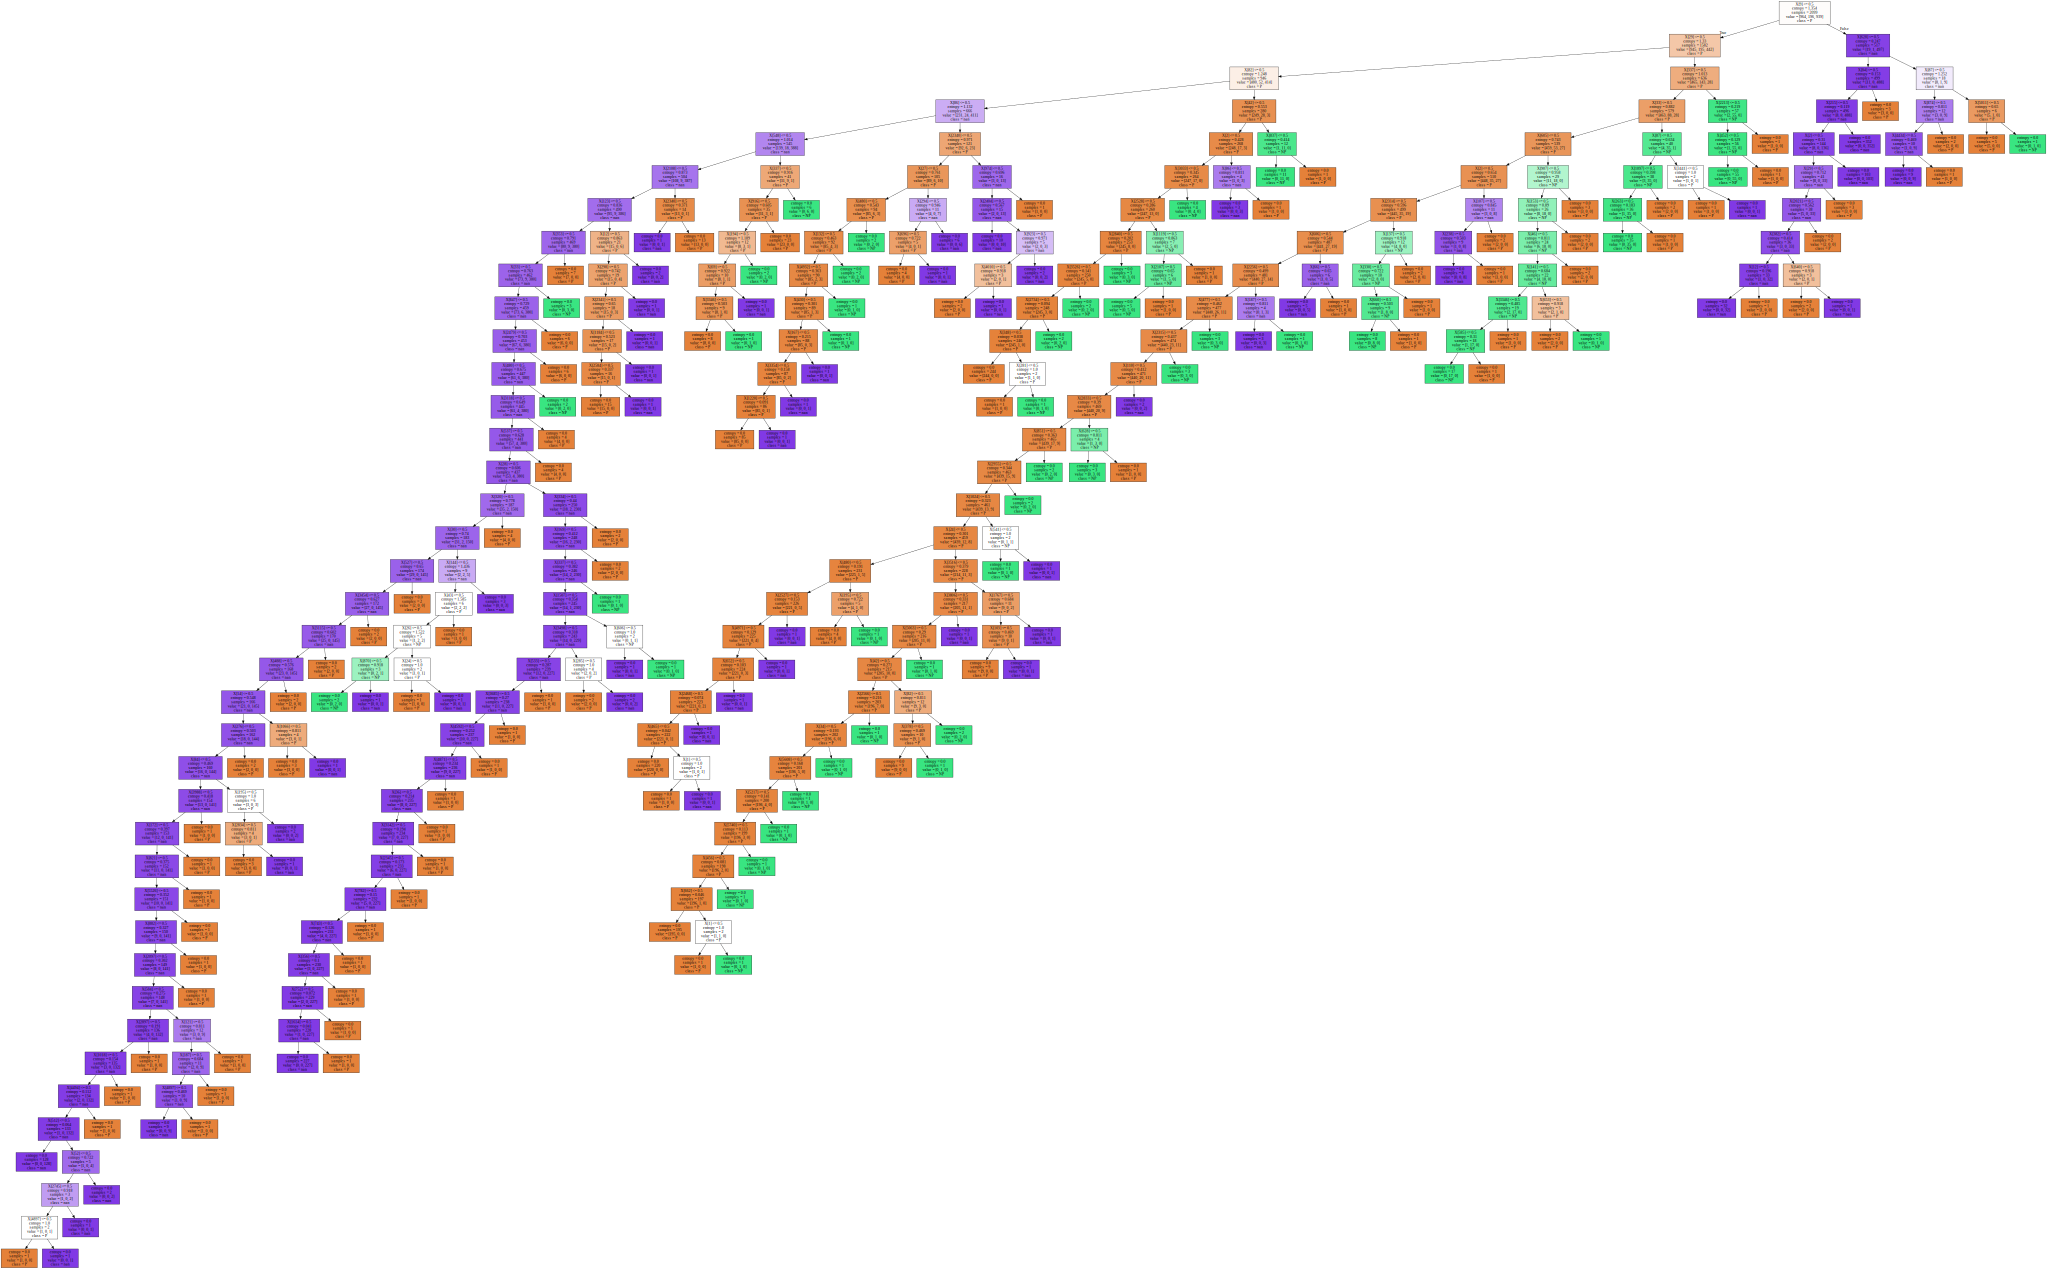

In [80]:
graph = Source(tree.export_graphviz(clf, out_file=None, filled = True, class_names=['P', 'NP', 'nan'], feature_names=))
display(SVG(graph.pipe(format='svg')))

In [36]:
print('[5]Decision Tree Training Accuracy: ', clf_gini.score(x_train, y_train))

[5]Decision Tree Training Accuracy:  1.0


In [38]:
models(x_train,y_train)

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0]Logistic Regression Training Accuracy:  0.9790376369699857
[1]KNeighborns Training Accuracy:  0.8804192472606003
[2]SVC Linear Training Accuracy:  0.993806574559314
[3]SVC RBF Training Accuracy:  0.6650786088613626
[4]Gaussian NB Training Accuracy:  0.8546927108146737
[5]Decision Tree Training Accuracy:  1.0
[6]Random Forest Training Accuracy:  0.9895188184849929


In [83]:
x_test = []
y_test = []
for element in baseOfTest:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_test.append(aux)
    y_test.append(element[1])

In [84]:
#makeAcuracy(clf,x_train,y_train)

In [85]:
y_pred = clf_gini.predict(x_test)
#print(y_pred)

In [86]:
cpl = []
for element in complet:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    cpl.append(aux)

In [87]:
y_pred_cpl = clf.predict(cpl)

In [88]:
df = pd.DataFrame({'HAS_VALUE': y_pred_cpl})
df.to_csv('prediction_ocomon.csv', index=False)

In [89]:
df

,HAS_VALUE
0,nan
1,P
2,NP
3,nan
4,NP
...,...
15797,NP
15798,NP
15799,NP
15800,NP


In [90]:
# porcent
total = 0
hvcpl = df_test.HAS_VALUE.tolist()
hvpre = df.HAS_VALUE.tolist()
for i, value in enumerate(hvpre):
    if value == hvcpl[i]:
        total += 1
(total * 100) / len(hvcpl)

NameError: name 'hv' is not defined

In [91]:
new_df = pd.read_csv('CSV/ocomon_test_2.0.csv')
new_df.tail(20)

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15782,computador nao liga foi formatado e instalado...,NaN,software,s.o,computador,NaN,jose,constanca dolores lopes monteiro,-999999,NP,...,8,57,3/4/2018,4,2,1,15,12,3/4/2018,sti_cca
15783,bateria fraca ocasionando problema ao ligar o ...,NaN,hardware,bateria,computador,NaN,rosane maria cruz,bolsista geral 2018,161934,NP,...,14,57,13/4/2018,4,2,2,15,10,13/4/2018,sti_central
15784,trocar bateriaaberto por victor bateria trocad...,NaN,bateria,N.A,nobreak,NaN,malvina thais pacheco rodrigues,bolsista geral 2018,223322,P,...,11,27,2/10/2018,4,4,1,14,49,2/10/2018,0
15785,formatar ppgca cca foi feita a formatacao e in...,NaN,software,s.o,computador,NaN,arnand,bolsista geral 2018,175582,NP,...,16,58,2/4/2019,4,2,1,8,32,4/4/2019,0
15786,fonte queimada null manutencao de computador,NaN,hardware,fonte,computador,teresina,uriel,bolsista geral 2018,164333,P,...,10,23,2/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central
15787,fonte queimada foi realizada a substituicao d...,NaN,hardware,fonte,computador,teresina,uriel,bolsista geral 2018,164333,P,...,10,23,2/9/2019,4,3,1,15,42,2/9/2019,sti_central
15788,nao liga foi realizada a limpeza e otimizacao ...,NaN,software,s.o,computador,teresina,conceicao,bolsista geral 2018,148210,NP,...,12,0,2/9/2019,4,3,1,15,37,2/9/2019,sti_central
15789,nao ligalocal ppg em alimentos e nutricaoabert...,NaN,hardware,hardware,computador,teresina,leonardo torres,bolsista geral 2018,255459,NP,...,9,41,3/9/2019,4,3,1,9,48,3/9/2019,0
15790,computador possui erro na inicializacao e nao ...,NaN,hardware,placa,computador,teresina,bruno pralon,bolsista geral 2018,215428,NP,...,9,28,4/9/2019,4,3,1,10,39,4/9/2019,sti_central
15791,o computador nao liga e necessita de formataca...,NaN,software,s.o,computador,teresina,amilton,bolsista geral 2018,128095,NP,...,11,32,6/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_cca


In [92]:
new_df['HAS_VALUE'] = hvpre
new_df.tail(20)

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15782,computador nao liga foi formatado e instalado...,NaN,software,s.o,computador,NaN,jose,constanca dolores lopes monteiro,-999999,NP,...,8,57,3/4/2018,4,2,1,15,12,3/4/2018,sti_cca
15783,bateria fraca ocasionando problema ao ligar o ...,NaN,hardware,bateria,computador,NaN,rosane maria cruz,bolsista geral 2018,161934,P,...,14,57,13/4/2018,4,2,2,15,10,13/4/2018,sti_central
15784,trocar bateriaaberto por victor bateria trocad...,NaN,bateria,N.A,nobreak,NaN,malvina thais pacheco rodrigues,bolsista geral 2018,223322,nan,...,11,27,2/10/2018,4,4,1,14,49,2/10/2018,0
15785,formatar ppgca cca foi feita a formatacao e in...,NaN,software,s.o,computador,NaN,arnand,bolsista geral 2018,175582,NP,...,16,58,2/4/2019,4,2,1,8,32,4/4/2019,0
15786,fonte queimada null manutencao de computador,NaN,hardware,fonte,computador,teresina,uriel,bolsista geral 2018,164333,P,...,10,23,2/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central
15787,fonte queimada foi realizada a substituicao d...,NaN,hardware,fonte,computador,teresina,uriel,bolsista geral 2018,164333,P,...,10,23,2/9/2019,4,3,1,15,42,2/9/2019,sti_central
15788,nao liga foi realizada a limpeza e otimizacao ...,NaN,software,s.o,computador,teresina,conceicao,bolsista geral 2018,148210,NP,...,12,0,2/9/2019,4,3,1,15,37,2/9/2019,sti_central
15789,nao ligalocal ppg em alimentos e nutricaoabert...,NaN,hardware,hardware,computador,teresina,leonardo torres,bolsista geral 2018,255459,NP,...,9,41,3/9/2019,4,3,1,9,48,3/9/2019,0
15790,computador possui erro na inicializacao e nao ...,NaN,hardware,placa,computador,teresina,bruno pralon,bolsista geral 2018,215428,NP,...,9,28,4/9/2019,4,3,1,10,39,4/9/2019,sti_central
15791,o computador nao liga e necessita de formataca...,NaN,software,s.o,computador,teresina,amilton,bolsista geral 2018,128095,NP,...,11,32,6/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_cca


In [93]:
new_df.to_csv('ocomon.csv', index=False)

In [94]:
new_df

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
0,foi solicitado a manutencao de pontos de reded...,NaN,N.A,N.A,ponto de rede,teresina,jaclason machado veras,julia sousa santos,-999999,nan,...,9,15,18/4/2012,1,2,4,9,0,26/4/2012,sti_cca
1,computador nao liga sujeira e mau na memoria ...,NaN,hardware,ram,computador,teresina,secretaria do mestrado de piliticas publicas,luis carlos dos santos farias,140981,P,...,8,13,23/4/2014,2,2,4,9,4,23/4/2014,sti_cchl
2,meu computador esta ligando o monitor tb mas a...,NaN,hardware,hardware,computador,teresina,gabinete do reitor 5511,constanca dolores lopes monteiro,-999999,NP,...,15,43,24/10/2011,1,4,4,15,59,24/10/2011,sti_central
3,desabilite o envio de email como o servico de ...,utilize esta descricao de problema para proble...,N.A,N.A,e-mail,teresina,guilherme,guilherme avelino,-999999,nan,...,13,20,24/10/2011,1,4,4,17,6,26/10/2011,sti_central
4,instalacao de impressoras e remocao de virus ...,NaN,hardware,virus,impressora,teresina,NaN,bolsista nti,-999999,NP,...,12,13,24/10/2011,1,4,4,9,11,26/10/2011,sti_central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15797,computador lentidao preuni cp foi realizado ba...,NaN,software,s.o,computador,teresina,erica cecilia,bolsista geral 2018,188134,NP,...,15,23,13/9/2019,4,3,3,8,21,17/9/2019,0
15798,computador lento e nao liga formatar apenas se...,NaN,hardware,outros,computador,teresina,igor cunha,bolsista geral 2018,175491,NP,...,16,21,13/9/2019,4,3,2,17,47,13/9/2019,0
15799,liga e desliga reinicia sozinho local prospeqi...,NaN,software,s.o,computador,teresina,joao xavier,bolsista geral 2018,237490,NP,...,16,31,16/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,s.o,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
